# Otto Product Classification: EDA and Voting Ensemble Model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import os
%matplotlib inline

## Load data

In [9]:
train = pd.read_csv("train_sample.csv")
testFinal = pd.read_csv("test_sample.csv")
display(train.head())
display(testFinal.head())

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
1,1,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,1,0,0,0,8
2,0,0,0,1,0,0,3,1,0,0,...,0,1,0,3,0,0,0,0,0,3
3,1,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,7,0,2,0,2
4,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,1,0,0,0,0,1,0,3,...,0,0,0,0,0,0,1,1,0,1
1,2,0,3,1,0,8,0,0,0,0,...,0,0,1,0,0,0,6,0,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,3,2,0
3,4,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,0,0


## EDA

### Summary Stats

In [11]:
#summary statistics of our data
summary = train.describe()
display(summary)

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
count,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,...,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000,41244.000000
mean,0.638178,0.682766,0.765687,0.738532,1.269106,0.139099,0.640142,0.592450,0.273349,0.320362,...,0.261711,0.639123,0.135050,0.538939,0.403768,1.062433,0.330957,0.582267,0.272500,3.836437
std,0.801242,3.291219,2.947494,3.254202,3.051133,0.946615,0.800234,1.600276,1.237465,1.095583,...,1.435798,0.802530,1.225193,1.912739,1.550053,2.476768,1.191753,1.353753,0.767436,2.507659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,6.000000
max,6.000000,105.000000,102.000000,80.000000,38.000000,30.000000,7.000000,39.000000,51.000000,30.000000,...,40.000000,6.000000,87.000000,52.000000,61.000000,149.000000,31.000000,36.000000,22.000000,8.000000


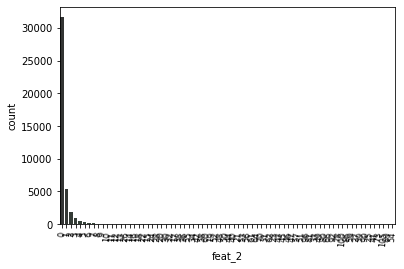

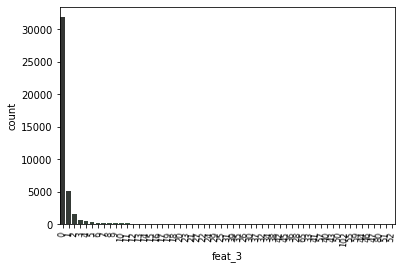

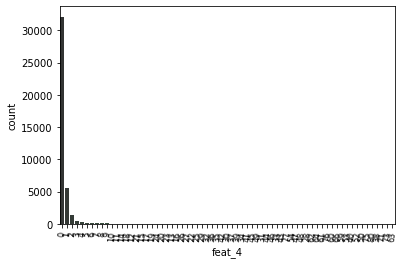

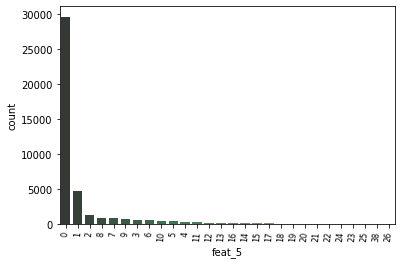

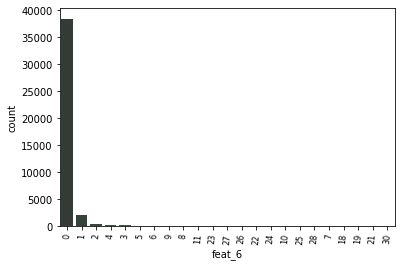

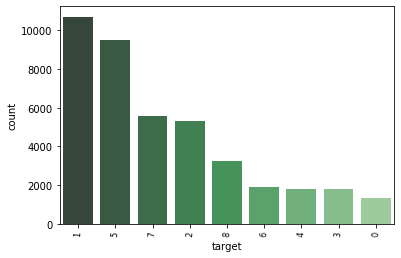

In [13]:
#count the number of unique levels for each feature as well as for Target 
nb_levels = pd.DataFrame()
cols = train.columns
for j in range(train.shape[1]):
    l = train[cols[j]].unique()
    nb_levels[cols[j]] = pd.Series(len(l))
#distribution of levels for some features
for feat in list(cols[1:6])+[cols[-1]]:
    figName = feat+'.png'
    plt.figure()
    sns.countplot(x=feat, data= train, order = train[feat].value_counts().index, palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.show()

## Feature Correlation

In [19]:
# feature correlation
corr = train[cols[1:-1]].corr()
corr

,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
feat_2,1.000000,0.026425,-0.008650,0.104988,0.016896,-0.009007,0.205066,0.287781,0.120611,0.045113,...,-0.031433,-0.002410,0.004464,0.021725,0.005502,-0.011440,-0.020146,-0.023953,0.155010,0.023244
feat_3,0.026425,1.000000,0.182153,0.021166,0.001723,0.001473,0.338928,0.261706,0.063747,-0.002119,...,-0.051346,0.067767,0.006811,0.028576,0.001752,0.160474,0.231179,0.031575,0.081541,0.208329
feat_4,-0.008650,0.182153,1.000000,-0.035831,-0.011035,-0.006710,0.050764,0.105536,0.058166,-0.019764,...,-0.057270,0.004117,0.005843,0.009045,-0.023030,0.009225,0.109379,0.025577,0.004013,0.152968
feat_5,0.104988,0.021166,-0.035831,1.000000,-0.008352,0.004916,0.053688,0.116395,-0.008194,0.036006,...,-0.115762,-0.006496,-0.002234,0.005280,-0.073303,-0.042149,-0.005820,-0.071817,0.046118,-0.009252
feat_6,0.016896,0.001723,-0.011035,-0.008352,1.000000,0.002385,0.023963,0.011256,0.002737,0.004805,...,-0.008393,-0.008803,-0.000659,0.000653,0.006965,0.121581,0.055947,-0.006119,0.159928,0.045314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feat_89,-0.011440,0.160474,0.009225,-0.042149,0.121581,0.000053,0.105196,0.028314,-0.012379,0.013272,...,0.023032,0.029467,-0.005054,0.074331,-0.009715,1.000000,0.060664,0.009852,0.055631,0.086057
feat_90,-0.020146,0.231179,0.109379,-0.005820,0.055947,0.001219,0.141878,0.086880,0.015245,-0.015331,...,-0.045094,0.046296,0.000991,0.124338,0.001419,0.060664,1.000000,0.067891,0.087664,0.094107
feat_91,-0.023953,0.031575,0.025577,-0.071817,-0.006119,-0.004549,0.056462,-0.003834,0.032369,-0.018832,...,-0.049290,0.399037,-0.001218,-0.000705,0.013375,0.009852,0.067891,1.000000,0.069193,0.037761
feat_92,0.155010,0.081541,0.004013,0.046118,0.159928,0.003178,0.239349,0.176586,0.113316,0.009451,...,-0.000010,0.123808,0.003045,0.065006,0.030642,0.055631,0.087664,0.069193,1.000000,0.075217


In [20]:
# maximum correlation between features
# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
oc = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

print("Top 10 highest positive correlation coefficients between features")
max_corr_pos = oc.head(10)
display(max_corr_pos)
print("  ")
print("Top 5 highest negative correlation coefficients between features")
max_corr_neg = oc.tail(5)
display(max_corr_neg)

Top 10 highest positive correlation coefficients between features


feat_25  feat_34    0.820197
feat_30  feat_73    0.757967
feat_33  feat_67    0.745678
feat_18  feat_35    0.709355
feat_60  feat_65    0.702815
feat_6   feat_81    0.639295
feat_5   feat_69    0.611689
feat_29  feat_61    0.610313
feat_5   feat_65    0.593054
feat_32  feat_65    0.574177
dtype: float64

  
Top 5 highest negative correlation coefficients between features


feat_15  feat_56   -0.139238
feat_19  feat_90   -0.140074
feat_5   feat_19   -0.151223
feat_56  feat_65   -0.156115
feat_5   feat_56   -0.205820
dtype: float64

We can see that few features (like feat_25 and feat_34) are positively and highly correlated, with a maximum correlation coefficient of 0.82. Thus, we may think of a way to reduce dimensionality of the feature space, albeit no significant information loss occurs. Overall, there is no high negative correlation between features.

## Seperate X and y

In [22]:
#seperate features and target
cols = train.columns
X = train[cols[1:-1]]
y = train[cols[-1]]
print(y.head(10))

#factorize y
y = pd.factorize(y)[0]
y = y+1
print(y[:10])

0    1
1    8
2    3
3    2
4    1
5    5
6    1
7    1
8    1
9    1
Name: target, dtype: int64
[1 2 3 4 1 5 1 1 1 1]


Notice that we excluded the `id column` from our features since it's a unique identifier of the product and wouldn't add much information to our analysis

## PCA transformation

In [23]:
# try PCA
pca = PCA()
pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)

for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), 
                                cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = ['PC_'+str(i+1) for i in range(X.shape[1])], 
                     index = ['Proportion of variance', 'Cumulative proportion']))

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50,PC_51,PC_52,PC_53,PC_54,PC_55,PC_56,PC_57,PC_58,PC_59,PC_60,PC_61,PC_62,PC_63,PC_64,PC_65,PC_66,PC_67,PC_68,PC_69,PC_70,PC_71,PC_72,PC_73,PC_74,PC_75,PC_76,PC_77,PC_78,PC_79,PC_80,PC_81,PC_82,PC_83,PC_84,PC_85,PC_86,PC_87,PC_88,PC_89,PC_90,PC_91,PC_92
Proportion of variance,0.116973,0.082454,0.062957,0.059967,0.044185,0.039892,0.035052,0.031603,0.029192,0.027143,0.024741,0.022588,0.021656,0.020185,0.019557,0.019008,0.017610,0.017371,0.015804,0.014222,0.012601,0.011933,0.010683,0.010490,0.010248,0.009693,0.008746,0.008718,0.008128,0.007606,0.007466,0.007189,0.006778,0.006735,0.006604,0.006438,0.006225,0.006025,0.005728,0.005538,0.005262,0.004861,0.004850,0.004724,0.004276,0.004037,0.003983,0.003821,0.003677,0.003451,0.003345,0.003174,0.003079,0.003037,0.002827,0.002777,0.002666,0.00253,0.002451,0.002402,0.002307,0.002237,0.002132,0.002059,0.001885,0.001810,0.001754,0.001730,0.001621,0.00159,0.001463,0.001366,0.001332,0.001269,0.00124,0.001229,0.001216,0.001207,0.001202,0.001195,0.001191,0.001177,0.001174,0.001172,0.001121,0.000986,0.000904,0.000880,0.000826,0.000769,0.000718,0.000272
Cumulative proportion,0.116973,0.199427,0.262384,0.322351,0.366536,0.406428,0.441480,0.473083,0.502274,0.529418,0.554159,0.576747,0.598403,0.618588,0.638145,0.657153,0.674763,0.692134,0.707939,0.722161,0.734762,0.746695,0.757378,0.767868,0.778116,0.787809,0.796555,0.805273,0.813402,0.821008,0.828473,0.835662,0.842440,0.849175,0.855779,0.862217,0.868442,0.874466,0.880194,0.885733,0.890995,0.895857,0.900706,0.905430,0.909706,0.913743,0.917726,0.921547,0.925225,0.928676,0.932021,0.935195,0.938274,0.941310,0.944138,0.946915,0.949581,0.95211,0.954562,0.956964,0.959271,0.961508,0.963640,0.965699,0.967584,0.969394,0.971148,0.972879,0.974500,0.97609,0.977553,0.978919,0.980251,0.981520,0.98276,0.983989,0.985205,0.986412,0.987614,0.988810,0.990001,0.991177,0.992352,0.993524,0.994645,0.995631,0.996535,0.997415,0.998241,0.999010,0.999728,1.000000


We note that 90% of the variance can be explained by the first 43 principal components. Thus, a dimensionality reduction is indeed possible!

In [25]:
pca_43 = PCA(43)
X_red = pca_43.fit_transform(X)
X_red.shape

(41244, 43)

## Another feature transformation

We will try out 2 feature selection techniques using the sklearn functions `SelectFromModel` and `SelectKBest`. 
- For the first one, we will fit a Tree-based classifier whose features importance weights would serve for the selection method. 
- For the second, we will use the mutual information as a selection criterion.

In [26]:
# model 1:
clf = ExtraTreesClassifier(max_features=None)
clf = clf.fit(X, y)
model1 = SelectFromModel(clf, prefit=True)
idx1 = model1.get_support(indices=True)
X_new_1 = model1.transform(X)   
feat_selected1 = list(X.columns[idx1])
print("%d features selected"%len(feat_selected1))
print('---------------------')
print(feat_selected1)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


28 features selected
---------------------
['feat_4', 'feat_5', 'feat_18', 'feat_19', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_29', 'feat_30', 'feat_35', 'feat_37', 'feat_38', 'feat_40', 'feat_42', 'feat_52', 'feat_53', 'feat_56', 'feat_60', 'feat_61', 'feat_63', 'feat_66', 'feat_69', 'feat_72', 'feat_73', 'feat_77', 'feat_84']


In [27]:
# model 2:
model2 = SelectKBest(mutual_info_classif, k=40).fit(X,y)
idx2 = model2.get_support(indices=True)
X_new_2 = model2.transform(X) 
feat_selected2 = list(X.columns[idx2])
print("%d features selected"%len(feat_selected2))
print('---------------------')
print(feat_selected2)

40 features selected
---------------------
['feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_8', 'feat_9', 'feat_10', 'feat_15', 'feat_19', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_29', 'feat_30', 'feat_32', 'feat_37', 'feat_38', 'feat_40', 'feat_42', 'feat_43', 'feat_44', 'feat_47', 'feat_50', 'feat_52', 'feat_53', 'feat_55', 'feat_56', 'feat_60', 'feat_61', 'feat_63', 'feat_65', 'feat_66', 'feat_69', 'feat_72', 'feat_75', 'feat_80', 'feat_82', 'feat_84', 'feat_90']


In [28]:
# look for the common features selected using both methods
common_feat_selected = [f for f in feat_selected1 if f in feat_selected2]
print("%d common features selected for both methods"%len(common_feat_selected))
print("-------------------------------------------")
print(common_feat_selected)

23 common features selected for both methods
-------------------------------------------
['feat_4', 'feat_5', 'feat_19', 'feat_23', 'feat_24', 'feat_25', 'feat_26', 'feat_29', 'feat_30', 'feat_37', 'feat_38', 'feat_40', 'feat_42', 'feat_52', 'feat_53', 'feat_56', 'feat_60', 'feat_61', 'feat_63', 'feat_66', 'feat_69', 'feat_72', 'feat_84']


## Predictive model

In [29]:
# spit data into train/test/validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size =0.2, random_state = 42)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(26396,)
(8249,)
(6599,)


Checking class distributions for the 3 sets

In [30]:
def plot_class_dist(y, label):
    title = 'target_'+label
    total = len(y)
    f = plt.figure()
    ax = sns.countplot(y,  order=[1,2,3,4,5,6,7,8,9], palette="Greens_d")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()

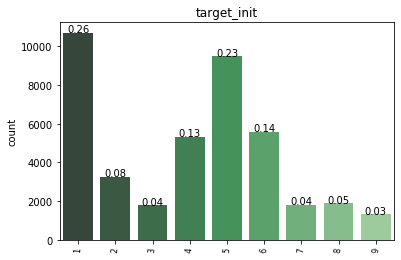

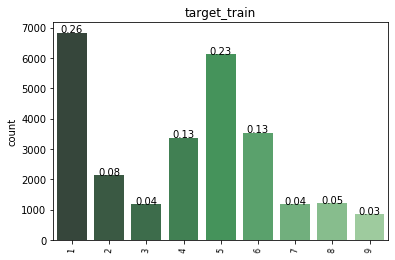

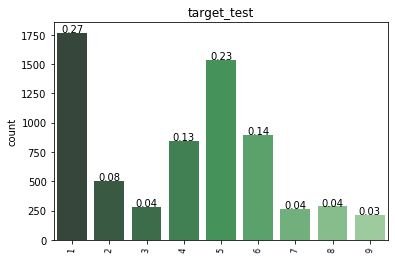

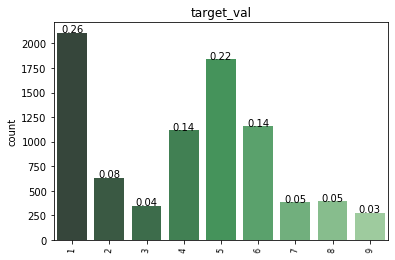

In [31]:
# compare distributions with the initial one
plot_class_dist(y, 'init')
plot_class_dist(y_train, 'train')
plot_class_dist(y_test, 'test')
plot_class_dist(y_val, 'val')

Now, we are going to try out some classification models using the original features and evaluate the score by cross-validation.

## Performance metric 1 : Mean accuracy

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from scipy import interp

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)

#choose some classification models
models = [KNeighborsClassifier(5), RandomForestClassifier(), LinearSVC(), 
          LogisticRegression(), GradientBoostingClassifier(), MLPClassifier(), 
          GaussianNB(), QuadraticDiscriminantAnalysis() ]

def train_cv(X, y):
    X = np.array(X)
    y = np.array(y)
    mean_accuracy ={}
    for clf in models:
        i = 0
        accuracy = []
        print(str(clf.__class__.__name__))
        for train, test in cv.split(X,y):
            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])
            # Compute balanced accuracy on the test fold
            acc = accuracy_score(y[test], y_pred)
            accuracy.append(acc)
            print('fold %d (acc = %0.2f)' % (i, acc))
            i += 1
        mean_accuracy[clf.__class__.__name__] = np.mean(accuracy)
        
    for key in mean_accuracy.keys():
        mean_accuracy[key] = '%.2f' %mean_accuracy[key]
    return mean_accuracy
    
mean_accuracy_init = train_cv(X,y)

KNeighborsClassifier
fold 0 (acc = 0.76)
fold 1 (acc = 0.76)
fold 2 (acc = 0.76)
fold 3 (acc = 0.76)
fold 4 (acc = 0.76)
RandomForestClassifier


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold 0 (acc = 0.76)
fold 1 (acc = 0.76)
fold 2 (acc = 0.75)
fold 3 (acc = 0.75)
fold 4 (acc = 0.76)
LinearSVC


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 0 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 1 (acc = 0.75)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 2 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 3 (acc = 0.75)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 4 (acc = 0.74)
LogisticRegression
fold 0 (acc = 0.75)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 1 (acc = 0.75)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 2 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 3 (acc = 0.76)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 4 (acc = 0.75)
GradientBoostingClassifier
fold 0 (acc = 0.78)
fold 1 (acc = 0.78)
fold 2 (acc = 0.77)
fold 3 (acc = 0.78)
fold 4 (acc = 0.78)
MLPClassifier


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 0 (acc = 0.77)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 1 (acc = 0.76)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 2 (acc = 0.76)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 3 (acc = 0.76)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 4 (acc = 0.76)
GaussianNB
fold 0 (acc = 0.64)
fold 1 (acc = 0.64)
fold 2 (acc = 0.62)
fold 3 (acc = 0.63)
fold 4 (acc = 0.63)
QuadraticDiscriminantAnalysis
fold 0 (acc = 0.69)
fold 1 (acc = 0.69)
fold 2 (acc = 0.68)
fold 3 (acc = 0.68)
fold 4 (acc = 0.68)


In [33]:
display(pd.DataFrame.from_dict(mean_accuracy_init, orient="index"))

,0
KNeighborsClassifier,0.76
RandomForestClassifier,0.76
LinearSVC,0.74
LogisticRegression,0.75
GradientBoostingClassifier,0.78
MLPClassifier,0.76
GaussianNB,0.63
QuadraticDiscriminantAnalysis,0.68


In [34]:
# training on PCA data
models = [KNeighborsClassifier(5), RandomForestClassifier(), LinearSVC(), 
              LogisticRegression(), MLPClassifier()]

mean_accuracy_pca = train_cv(X_red, y)

KNeighborsClassifier
fold 0 (acc = 0.76)
fold 1 (acc = 0.76)
fold 2 (acc = 0.76)
fold 3 (acc = 0.77)
fold 4 (acc = 0.76)
RandomForestClassifier


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


fold 0 (acc = 0.74)
fold 1 (acc = 0.75)
fold 2 (acc = 0.74)
fold 3 (acc = 0.76)
fold 4 (acc = 0.74)
LinearSVC


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 0 (acc = 0.73)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 1 (acc = 0.73)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 2 (acc = 0.73)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


fold 3 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 4 (acc = 0.72)
LogisticRegression
fold 0 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 1 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 2 (acc = 0.73)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 3 (acc = 0.74)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


fold 4 (acc = 0.73)
MLPClassifier


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 0 (acc = 0.77)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 1 (acc = 0.77)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 2 (acc = 0.77)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


fold 3 (acc = 0.77)
fold 4 (acc = 0.77)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
display(pd.DataFrame.from_dict(mean_accuracy_pca, orient="index"))

,0
KNeighborsClassifier,0.76
RandomForestClassifier,0.75
LinearSVC,0.73
LogisticRegression,0.74
MLPClassifier,0.77


## One-Vs-Rest Classification

In [36]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

def train_OvR(X, y, clf, filename):
    X = np.array(X)
    y = np.array(y)
    # Binarize the output
    y = label_binarize(y, classes=[1,2,3,4,5,6,7,8,9])
    n_classes = y.shape[1]
    
    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                       random_state=0)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(clf)
    if hasattr(clf.__class__, 'predict_proba'):
        y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    elif hasattr(clf.__class__, 'decision_function'):
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    else:
        print('estimator used does not implement decision_function nor predict_proba')
        
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #roc_auc_weighted = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i], )
        roc_auc[i+1] = auc(fpr[i], tpr[i])
        #roc_auc_weighted [i+1] = roc_auc_score(y_test[:, i], y_score[:, i], average = 'weighted')
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this point
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    f= plt.figure(figsize=(10,10))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
              color='navy', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'gray', 'goldenrod', 'crimson', 'chocolate', 'yellow', 'mediumspringgreen']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i+1]))
        
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic using '+str(clf.__class__.__name__))
    plt.legend(loc="lower right")
    plt.show()
    f.savefig(os.path.join(path, 'EDA', filename))
    return roc_auc

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: T

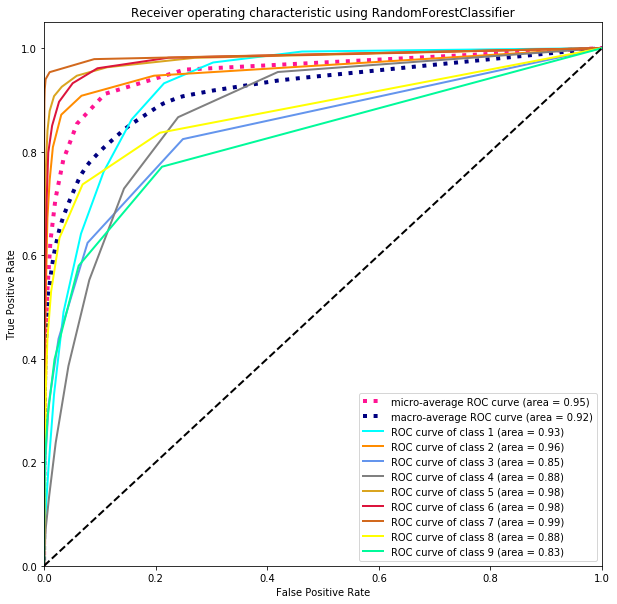

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophie/Desktop/Sophie/MScA Autumn 2019/Machine Learning/Course Project/EDA/ROC_OvR_RandomForestClassifier.png'

In [39]:
# RandomForestClassisier + original data
clf = RandomForestClassifier()
roc_auc_rf = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')
display(roc_auc_rf)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

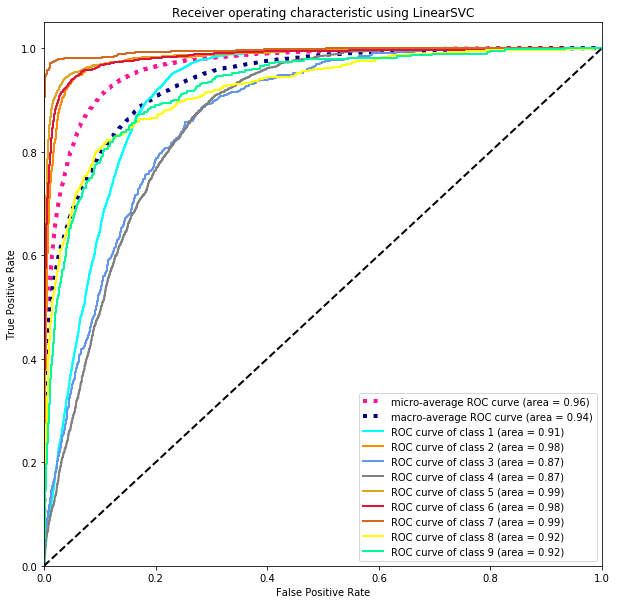

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophie/Desktop/Sophie/MScA Autumn 2019/Machine Learning/Course Project/EDA/ROC_OvR_LinearSVC.png'

In [40]:
# LinearSVC + original data
clf = LinearSVC()
roc_auc_svm = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')
display(roc_auc_svm)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

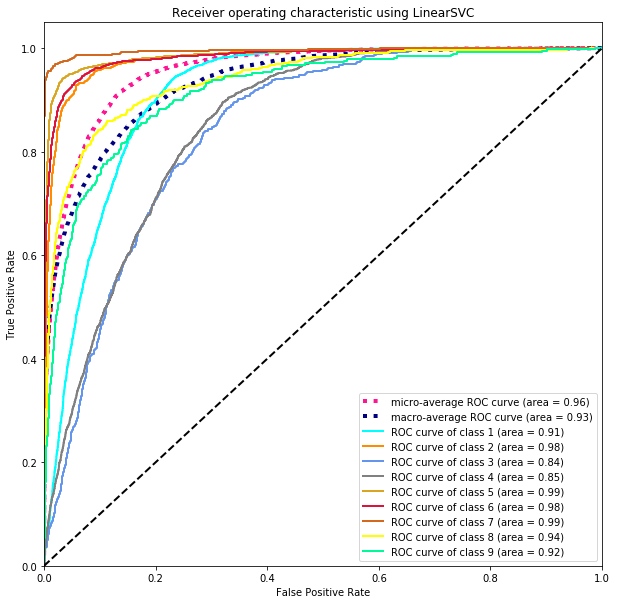

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophie/Desktop/Sophie/MScA Autumn 2019/Machine Learning/Course Project/EDA/ROC_OvR_LinearSVC.png'

In [41]:
# LinearSVC + Class weight + original data
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')
display(roc_auc_svm_bal)

In [ ]:
# MLPClassifier + original data
clf = MLPClassifier()
roc_auc_mlp = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

In [ ]:
# GaussianNB + original data
clf = GaussianNB()
roc_auc_gnb = train_OvR(X, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'.png')

In [ ]:
# LinearSVC + Class weight + PCA data
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X_red, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'_using_PCA.png')
display(roc_auc_svm_bal)

We can notice that using the PCA-transformed feature space, we don't loose too much information when we use LinearSVC with balanced class weights as a classifier. Thus, for the sake of computation time optimization, one would prefer to use the reduced data rather than the initial one.

In [ ]:
# LinearSVC + Class weight + Feature-selected 1 data
clf = LinearSVC(class_weight = 'balanced')
roc_auc_svm_bal = train_OvR(X_new_1, y, clf, 'ROC_OvR_'+str(clf.__class__.__name__)+'_using_FS.png')

## Voting Classifier

Creating a voting ensemble model for classification using the `VotingClassifier` class

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked aggregation) and is currently not provided in scikit-learn.

The code below provides an example of combining the predictions of logistic regression, decision trees and support vector machines together for our classification problem.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

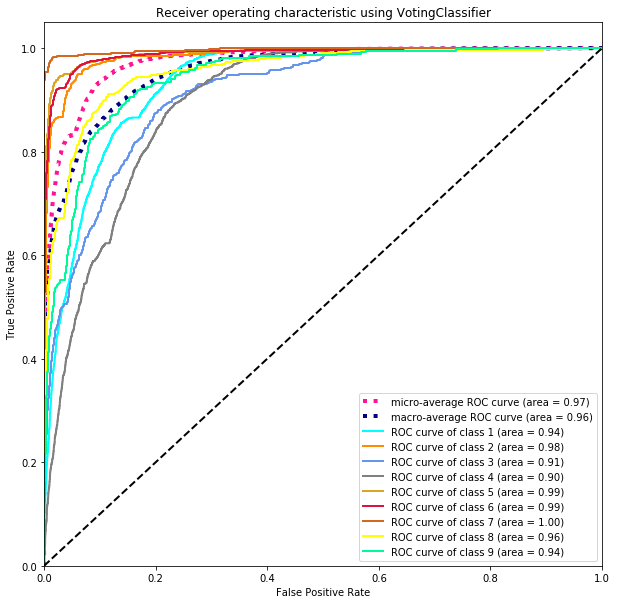

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophie/Desktop/Sophie/MScA Autumn 2019/Machine Learning/Course Project/EDA/ROC_OvR_for_voting_clf.png'

In [43]:
from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt', model2))
model3 = MLPClassifier()
estimators.append(('mlp', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
roc_auc_ens = train_OvR(X, y, ensemble, 'ROC_OvR_for_voting_clf.png')